# How to download from Colab?

In [ ]:
from google.colab import files
outputPath = "saved_file.csv"
dataset.to_csv(outputPath)
files.download(outputPath)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from matplotlib import pylab
params = {'xtick.labelsize': 18,
 'ytick.labelsize': 18,
 'axes.titlesize' : 22,
 'axes.labelsize' : 20,
 'legend.fontsize': 18,
 'legend.title_fontsize': 22,
 'figure.titlesize': 24 }
pylab.rcParams.update(params)

# Loading the dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!rm *.csv

from google.colab import files
print("Please load the raw csv data")
uploadedData = files.upload()
filename = list(uploadedData)[0]

Please load the raw csv data


Saving virus_data.csv to virus_data.csv


In [ ]:
dataset = pd.read_csv(filename)

# Part 1- Data loading and First look

**(Q1)**  Load the dataset into a Pandas DataFrame and get shape

In [ ]:
dataset.shape

(1250, 26)

In [ ]:
dataset.head(10) # printing first rows of the data

patient_id  age sex  weight blood_type           current_location  \
0        1903   32   F    70.8         O+  ('19.04222', '-98.11889')   
1        1166   47   M    74.3         A+   ('51.62907', '-0.74934')   
2        1963   36   M    91.5         O+   ('39.12074', '27.18052')   
3         856   38   M    74.4         O+    ('40.1675', '34.37389')   
4        1808   23   F    59.7         A+          ('48.25', '16.4')   
5         867   12   F    40.5         O+  ('43.82634', '144.09638')   
6         346   60   M    87.1         O-        ('3.51667', '11.5')   
7         605   34   F    66.3         B+     ('48.98994', '2.1699')   
8         104   46   M    69.3         O+  ('27.09978', '-82.45426')   
9         582   28   M    69.2         B-   ('25.87498', '86.59611')   

   num_of_siblings  happiness_score  household_income  conversations_per_day  \
0                3                9                 1                      6   
1                2               10                 2                     13   
2                4               11                 4                      6   
3                1                8                 2                     15   
4                1               10                 2                      3   
5                5               10                 2                      2   
6                1                8                 0                      3   
7                2               11                 1                      4   
8                1               10                 2                      2   
9                1               11                 2                      6   

   ...     PCR_03    PCR_04      PCR_05     PCR_06    PCR_07     PCR_08  \
0  ...   1.041181 -1.105253  108.517714   6.175927  6.095500   3.901404   
1  ...  96.121688 -2.438268  314.041672  25.188875  4.964383   4.544491   
2  ...   5.531260 -5.282569  175.215865   5.462792  4.961834   3.340734   
3  ...  -9.795680 -5.032215  292.933617   7.024178  2.951563   1.775654   
4  ...  35.588668 -9.548718   36.885983  22.601152  5.961358   5.664607   
5  ... -73.712920 -8.923734  133.408788  16.699263  2.023773   1.771838   
6  ... -75.655624 -6.890172   46.066850  10.006127  5.708340  12.557194   
7  ... -57.831761 -3.176165   41.283271  13.660112  1.702696   1.529765   
8  ... -43.781215  0.080444  242.615944  -1.272377  3.802525   5.806413   
9  ...  -3.473567 -8.661049  195.605069  -1.796992  0.026815   3.397446   

     PCR_09     PCR_10  spread  risk  
0  7.298945 -13.627960       1    -1  
1  5.086298   1.891701      -1     1  
2  1.713049 -11.613582      -1     1  
3  0.675661  -5.757544      -1    -1  
4 -4.736603  -4.422387      -1     1  
5 -4.974834  -1.931371       1     1  
6 -1.044775  -7.754850      -1     1  
7  3.941358  -3.313184       1     1  
8  6.131516  -1.951960      -1     1  
9 -3.895324   0.488943       1     1  

[10 rows x 26 columns]

In [ ]:
#Exploring features
print(dataset.columns)
print('\n')
dataset.info()

Index(['patient_id', 'age', 'sex', 'weight', 'blood_type', 'current_location',
       'num_of_siblings', 'happiness_score', 'household_income',
       'conversations_per_day', 'sugar_levels', 'sport_activity', 'symptoms',
       'pcr_date', 'PCR_01', 'PCR_02', 'PCR_03', 'PCR_04', 'PCR_05', 'PCR_06',
       'PCR_07', 'PCR_08', 'PCR_09', 'PCR_10', 'spread', 'risk'],
      dtype='object')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1250 entries, 0 to 1249
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   patient_id             1250 non-null   int64  
 1   age                    1250 non-null   int64  
 2   sex                    1250 non-null   object 
 3   weight                 1250 non-null   float64
 4   blood_type             1250 non-null   object 
 5   current_location       1250 non-null   object 
 6   num_of_siblings        1250 non-null   int64  
 7   happiness_score        1250 n

**(Q2)** Printing value counts of "conversations_per_day"

In [ ]:
dataset['conversations_per_day'].value_counts()


3     224
2     215
4     190
5     156
6     111
1     104
8      72
7      60
9      39
10     23
11     19
12     12
13      9
14      6
17      4
15      2
16      2
19      1
22      1
Name: conversations_per_day, dtype: int64

**(Q4)** Split to train and test

In [ ]:
from sklearn.model_selection import train_test_split

random_state = 76+57

# Split the dataset into training and test sets
train, test = train_test_split(dataset, test_size=0.2, random_state=random_state)


# Part 2- Warming up with KNN

**Task A** - seaborn pair plot

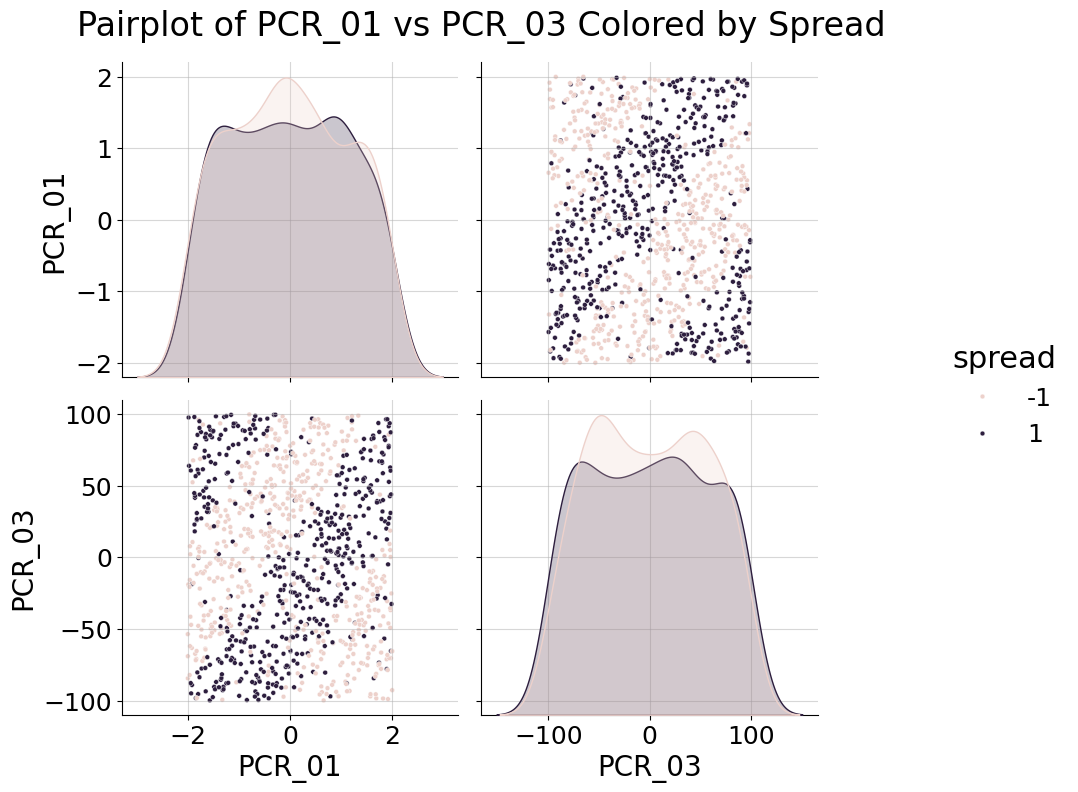

In [ ]:
import seaborn as sns
g=sns.pairplot(data=train, hue= 'spread', vars = ['PCR_01', 'PCR_03'], plot_kws={"s": 12})
g.fig.suptitle("Pairplot of PCR_01 vs PCR_03 Colored by Spread", y=1.04)
for ax in np.ravel(g.axes):
 ax.grid(alpha=0.5)
g.fig.set_size_inches(12,8)

**(Q6)** Compute correlation between spread and PCR_01 and PCR_03

In [ ]:
# Compute the correlation between 'spread' and the PCR features
correlation_pcr01_spread = train['spread'].corr(train['PCR_01'])
correlation_pcr03_spread = train['spread'].corr(train['PCR_03'])

print("Correlation is:{:.3f}".format(correlation_pcr01_spread))
print("Correlation is:{:.3f}".format(correlation_pcr03_spread))


Correlation is:0.006
Correlation is:-0.004



**Task B- Implement KNN**

In [ ]:
import numpy as np
from scipy.spatial.distance import cdist
from sklearn.base import BaseEstimator, ClassifierMixin

class kNN(BaseEstimator, ClassifierMixin):
    def __init__(self, n_neighbors: int = 3):
        if n_neighbors <= 0:
            raise ValueError("n_neighbors must be greater than 0")
        self.n_neighbors = n_neighbors
        self.X_memory= None
        self.y_memory = None

    def fit(self, X, y):
        # Store the training data and labels
        self.X_memory = np.copy(X)
        self.y_memory = np.copy(y)
        return self

    def predict(self, X):
        if self.X_memory is None or self.y_memory is None:
            raise Exception("The model has not been fit with training data")

        # Compute distance matrix
        distances = cdist(X, self.X_memory)

        # Adjust k if it's greater than the number of examples in memory
        k_adjusted = min(self.n_neighbors, self.X_memory.shape[0])

        # Find k nearest neighbours indices using the adjusted k value
        #np.argpartition arraging array from zero, so if for example we want 2 neighbours,
        #we must ask to partition each row such that element number 1 is in correct place
        k_nearest_indices = np.argpartition(distances, k_adjusted - 1, axis=1)[:, :k_adjusted]

        # Retrieve the labels for the k-nearest neighbors
        k_nearest_labels = self.y_memory[k_nearest_indices]

        # Sum the labels; positive sum -> majority is 1, negative sum -> majority is -1
        sum_labels = np.sum(k_nearest_labels, axis=1)
        majority_labels = np.sign(sum_labels)

        # Handling the case where sum is 0 (tie)
        majority_labels[majority_labels == 0] = -1

        # The majority_labels now contains the predicted label for each point in X
        predictions = majority_labels

        return predictions


**Task C- Visualise desicsion resons**

**visualize_clf**(Copied)

In [ ]:
#Add Visualize clf
def visualize_clf(clf, X, Y, title,
                  xlabel, ylabel,
                  marker_size=50,
                  grid_length=300,
                  linewidths=None):
    import matplotlib.pyplot as plt
    import pandas as pd
    from matplotlib.colors import ListedColormap

    if isinstance(X, pd.DataFrame):
        X = X.to_numpy()

    # For internal use here, make sure labels are 0 and 1
    Y = np.ravel(Y).astype(int)
    labels = set(Y)
    assert len(labels) == 2, "Can only visualize two unique labels"

    if labels == set([-1,1]):
      Y = (Y + 1) // 2
      labels = set(Y)

    assert labels == set([0,1]), "Could not handle given labels"

    plt.figure(figsize=(8, 8))

    # Parameters
    n_classes = 2
    markers = ["D", "o"]
    palette = sns.color_palette("hls", 2)
    custom_cmap = ListedColormap(palette.as_hex())

    x_delta = np.abs(X[:, 0].max() - X[:, 0].min()) * 0.1
    y_delta = np.abs(X[:, 1].max() - X[:, 1].min()) * 0.1
    x_min, x_max = X[:, 0].min() - x_delta, X[:, 0].max() + x_delta
    y_min, y_max = X[:, 1].min() - y_delta, X[:, 1].max() + y_delta
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, grid_length),
                         np.linspace(y_min, y_max, grid_length))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    cs = plt.contourf(xx, yy, Z, cmap=custom_cmap, alpha=0.35)

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(alpha=0.75)

    # Plot the training points
    for i, color, marker in zip(labels, palette, markers):
        idx = np.where(Y == i)
        plt.scatter(X[idx, 0], X[idx, 1], color=color,
                    marker=marker,
                    edgecolor='white', s=marker_size,
                    linewidths=linewidths)

    plt.title(title, fontsize=20)
    plt.axis("tight")
    plt.show()



**Training knn on the data(without normalization), print accuracy and present decision regions**

Training Accuracy: 1.0
Test Accuracy: 0.664


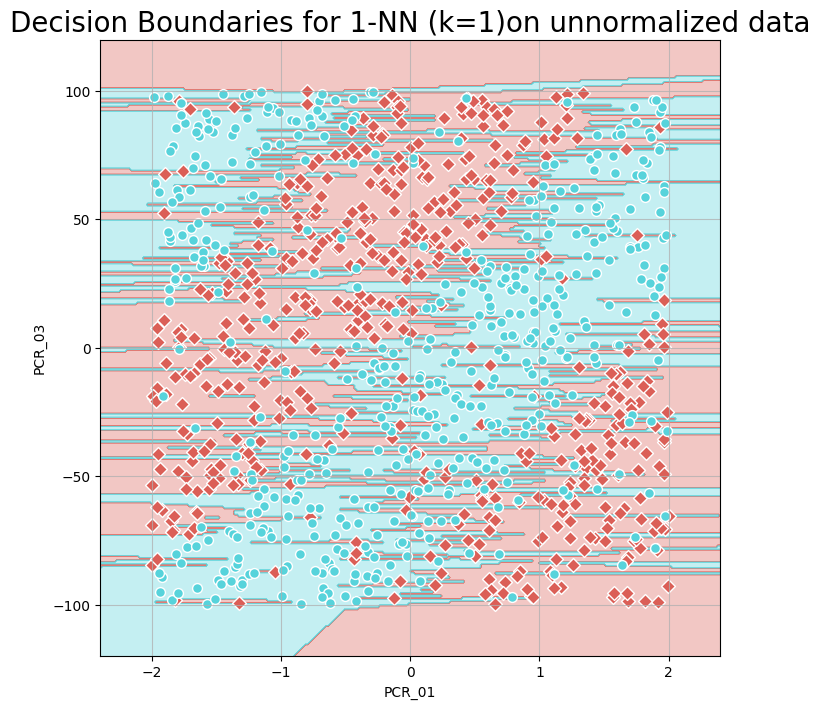

In [ ]:
# Extract features and labels for training set
X_train_subset = train[['PCR_01', 'PCR_03']]
y_train = train['spread']

# Initialize and fit the 1-NN model on the training subset
h = kNN(1)
h.fit(X_train_subset, y_train)

# Extract features and labels for test set
X_test_subset = test[['PCR_01', 'PCR_03']]
y_test = test["spread"]

# Calculate training accuracy
training_accuracy = h.score(X_train_subset, y_train)

# Calculate test accuracy
test_accuracy = h.score(X_test_subset, y_test)

# Print training and test accuracies
print("Training Accuracy:", training_accuracy)
print("Test Accuracy:", test_accuracy)

# Visualize decision boundaries for the 1-NN model on the training set
visualize_clf(h, X_train_subset, y_train, title="Decision Boundaries for 1-NN (k=1)on unnormalized data", xlabel="PCR_01", ylabel="PCR_03")


**(Q9)1-nn with min-max scaler**

Normalized Dataset:
Training Accuracy: 1.0
Test Accuracy: 0.756


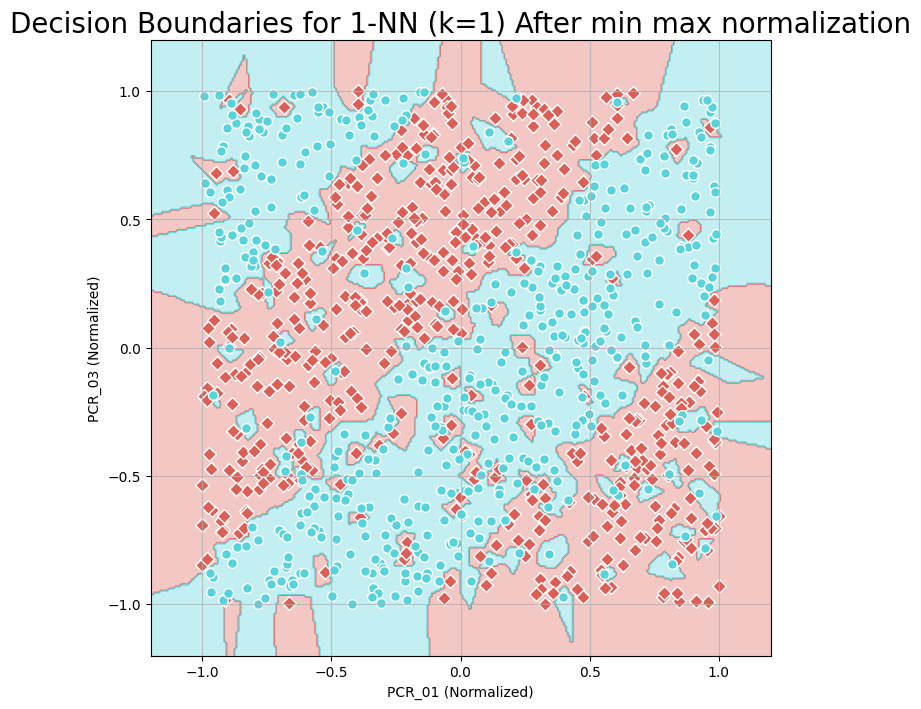

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Initialize MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1, 1))

# Fit and transform training data
X_train_subset_normalized = scaler.fit_transform(X_train_subset)

# Transform test data
X_test_subset_normalized = scaler.transform(X_test_subset)

# Train a new kNN model (k=1) on the normalized dataset
h_normalized = kNN(n_neighbors=1)
h_normalized.fit(X_train_subset_normalized, y_train)

# Calculate training accuracy
training_accuracy_normalized = h_normalized.score(X_train_subset_normalized, y_train)

# Calculate test accuracy
test_accuracy_normalized = h_normalized.score(X_test_subset_normalized, y_test)

# Print training and test accuracies for the normalized dataset
print("Normalized Dataset:")
print("Training Accuracy:", training_accuracy_normalized)
print("Test Accuracy:", test_accuracy_normalized)

# Visualize decision regions of the model
visualize_clf(h_normalized, X_train_subset_normalized, y_train,
              title="Decision Boundaries for 1-NN (k=1) After min max normalization",
              xlabel="PCR_01 (Normalized)",
              ylabel="PCR_03 (Normalized)")


**(Q10) 5-nn with min-max scaler**

Normalized Dataset:
Training Accuracy: 0.879
Test Accuracy: 0.852


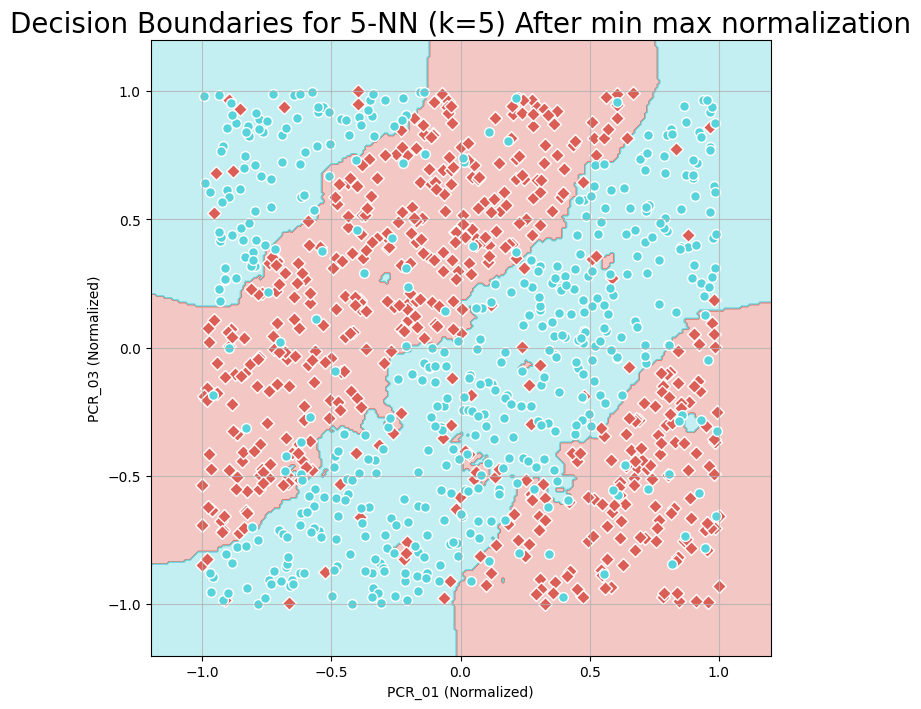

In [ ]:
from sklearn.preprocessing import MinMaxScaler

knn5_normalized = kNN(n_neighbors=5)
knn5_normalized.fit(X_train_subset_normalized, y_train)

# Calculate training accuracy
training_accuracy_normalized = knn5_normalized.score(X_train_subset_normalized, y_train)

# Calculate test accuracy
test_accuracy_normalized = knn5_normalized.score(X_test_subset_normalized, y_test)

# Print training and test accuracies for the normalized dataset
print("Normalized Dataset:")
print("Training Accuracy:", training_accuracy_normalized)
print("Test Accuracy:", test_accuracy_normalized)

# Visualize decision regions of the model
visualize_clf(knn5_normalized, X_train_subset_normalized, y_train,
              title="Decision Boundaries for 5-NN (k=5) After min max normalization",
              xlabel="PCR_01 (Normalized)",
              ylabel="PCR_03 (Normalized)")


# Part 3: Data Exploration

**Task D- Create special property**

In [ ]:
train_preprocessed = train.copy()
train_preprocessed['SpecialProperty'] = train_preprocessed['blood_type'].isin(['O+', 'B+']).astype(int)
train_preprocessed.drop('blood_type', axis=1, inplace=True)

test_preprocessed = test.copy()
test_preprocessed['SpecialProperty'] = test_preprocessed['blood_type'].isin(['O+', 'B+']).astype(int)
test_preprocessed.drop('blood_type', axis=1, inplace=True)

test_preprocessed.head()

patient_id  age sex  weight            current_location  num_of_siblings  \
338          64   32   M    63.7  ('20.21322', '-100.88023')                3   
317        1428   36   F    58.9   ('14.93333', '-91.11667')                3   
175        1775   26   M    85.2  ('-19.72806', '-50.19556')                0   
559         705   24   F    49.6    ('38.45598', '48.87498')                0   
810        1978   32   F    75.6    ('5.90702', '116.10146')                1   

     happiness_score  household_income  conversations_per_day  sugar_levels  \
338                8                 1                      2           107   
317                8                 5                      4            81   
175               10                 4                      6           114   
559               10                 2                      8            74   
810               10                 2                      2           106   

     ...    PCR_04      PCR_05     PCR_06    PCR_07    PCR_08    PCR_09  \
338  ... -3.066184    6.909364  -4.257191  8.321351  3.367999  4.294328   
317  ... -4.489888   37.510143 -21.056080  1.463748  5.279459 -0.052976   
175  ... -8.210405   83.833534 -13.937055  3.052037  5.359259 -3.622788   
559  ... -2.755419  171.549273   4.802712  1.419308  2.774952  5.392342   
810  ... -5.700782  334.023620  17.276597  6.956010  4.905921  0.926439   

       PCR_10  spread  risk  SpecialProperty  
338 -0.343139       1     1                0  
317 -0.500633       1     1                1  
175 -7.022402      -1    -1                0  
559  1.881530      -1     1                1  
810 -6.194421       1    -1                1  

[5 rows x 26 columns]

In [ ]:
print("{} out of {} samples do not have a recorded symptoms in train".format(train_preprocessed[train_preprocessed.symptoms.isna()].shape[0], train_preprocessed.shape[0]))

377 out of 1000 samples do not have a recorded symptoms in train


In [ ]:
print("{} out of {} samples do not have a recorded symptoms in test".format(test_preprocessed[test_preprocessed.symptoms.isna()].shape[0], test_preprocessed.shape[0]))

107 out of 250 samples do not have a recorded symptoms in test


**(Q13) - Extract info from symptoms**

In [ ]:
def count_symptoms(symptoms):
    symptoms_list = symptoms.split(';')
    return len(symptoms_list) if symptoms_list != [''] else 0

# Replace NaN with empty strings
train_preprocessed['symptoms'] = train_preprocessed['symptoms'].fillna('').astype(str)
test_preprocessed['symptoms'] = test_preprocessed['symptoms'].fillna('').astype(str)

# Count the number of symptoms each patient has
train_preprocessed['num_of_symptoms'] = train_preprocessed['symptoms'].apply(count_symptoms)
test_preprocessed['num_of_symptoms'] = test_preprocessed['symptoms'].apply(count_symptoms)

# Drop the 'symptoms' column
train_preprocessed.drop('symptoms', axis=1, inplace=True)
test_preprocessed.drop('symptoms', axis=1, inplace=True)



**Task E - Transform all features to numeric**

In [ ]:
#continue preprocessing

#Change sex to be 1/0
train_preprocessed['sex'] = train_preprocessed['sex'].map({'M': 0, 'F': 1})
test_preprocessed['sex'] = test_preprocessed['sex'].map({'M': 0, 'F': 1})

#Remove paitent id
train_preprocessed.drop('patient_id', axis=1, inplace=True)
test_preprocessed.drop('patient_id', axis=1, inplace=True)

# Handle date - transform it number of days since 0000-01-01
train_preprocessed['pcr_date'] = pd.to_datetime(train_preprocessed['pcr_date'])
test_preprocessed['pcr_date'] = pd.to_datetime(test_preprocessed['pcr_date'])

# Extract year, month, and day
train_preprocessed['pcr_year'] = train_preprocessed['pcr_date'].dt.year
train_preprocessed['pcr_month'] = train_preprocessed['pcr_date'].dt.month
train_preprocessed['pcr_day'] = train_preprocessed['pcr_date'].dt.dayofweek

test_preprocessed['pcr_year'] = test_preprocessed['pcr_date'].dt.year
test_preprocessed['pcr_month'] = test_preprocessed['pcr_date'].dt.month
test_preprocessed['pcr_day'] = test_preprocessed['pcr_date'].dt.dayofweek

#Remove the original `pcr_date`
train_preprocessed.drop('pcr_date', axis=1, inplace=True)
test_preprocessed.drop('pcr_date', axis=1, inplace=True)

# Split 'current_location' into 'latitude' and 'longitude'
train_preprocessed[['latitude', 'longitude']] = train_preprocessed['current_location'].str.strip("()").str.replace("'", "").str.split(',', expand=True).astype(float)
test_preprocessed[['latitude', 'longitude']] = test_preprocessed['current_location'].str.strip("()").str.replace("'", "").str.split(',', expand=True).astype(float)

#Remove the original 'current_location' column
train_preprocessed.drop('current_location', axis=1, inplace=True)
test_preprocessed.drop('current_location', axis=1, inplace=True)



In [ ]:
train_preprocessed

age  sex  weight  num_of_siblings  happiness_score  household_income  \
256    29    1    56.6                2                9                 2   
351    48    1    69.6                0                8                 2   
348    28    0    80.9                1                9                 1   
109    16    0    54.3                1               10                 3   
1093   10    0    30.6                0                8                 2   
...   ...  ...     ...              ...              ...               ...   
564    11    1    33.2                1                9                 6   
1025    5    0    18.1                2                7                 3   
1080   17    0    89.8                1               10                 0   
904    52    0    61.8                3               10                 1   
673    28    0    91.0                3                9                 2   

      conversations_per_day  sugar_levels  sport_activity    PCR_01  ...  \
256                       3           110               0  0.749098  ...   
351                       7            89               1 -1.301734  ...   
348                      13            84               1 -1.483507  ...   
109                       8            80               0  0.103837  ...   
1093                      2            59               1  1.878681  ...   
...                     ...           ...             ...       ...  ...   
564                       4            98               0  0.134484  ...   
1025                      4            75               4 -1.771951  ...   
1080                      1           103               0 -0.959892  ...   
904                       4           104               0 -1.526375  ...   
673                       3            71               0 -1.770593  ...   

         PCR_10  spread  risk  SpecialProperty  num_of_symptoms  pcr_year  \
256    0.799955      -1    -1                0                4      2022   
351    8.842312       1     1                1                0      2021   
348    6.333419       1     1                0                0      2021   
109   -6.303868      -1    -1                0                1      2022   
1093 -10.928784       1    -1                1                0      2021   
...         ...     ...   ...              ...              ...       ...   
564   -2.334492       1     1                0                1      2021   
1025   0.232490      -1    -1                0                2      2022   
1080  -4.522514      -1     1                1                0      2021   
904  -11.242184      -1    -1                1                0      2021   
673    4.123513       1    -1                1                0      2022   

      pcr_month  pcr_day  latitude  longitude  
256           8        4  22.75218   72.68533  
351           4        5  -7.54972  110.71639  
348          12        0  11.93381   79.82979  
109           9        6 -26.22861  -52.67056  
1093          9        2  48.21644    9.02596  
...         ...      ...       ...        ...  
564           2        2   9.91861  -68.30472  
1025          8        0  -5.85746  144.23058  
1080         10        4 -13.78040   34.45870  
904           5        2  37.65181  120.33063  
673           9        3  42.73920  -84.62081  

[1000 rows x 28 columns]

In [ ]:
test_preprocessed

age  sex  weight  num_of_siblings  happiness_score  household_income  \
338   32    0    63.7                3                8                 1   
317   36    1    58.9                3                8                 5   
175   26    0    85.2                0               10                 4   
559   24    1    49.6                0               10                 2   
810   32    1    75.6                1               10                 2   
..   ...  ...     ...              ...              ...               ...   
829   34    0    76.8                2                8                 0   
880   32    0    87.1                3                9                 1   
410    9    1    36.6                2               10                 1   
779   20    1    49.9                2                8                 1   
189   17    1    41.6                2                7                 1   

     conversations_per_day  sugar_levels  sport_activity    PCR_01  ...  \
338                      2           107               1  0.597341  ...   
317                      4            81               1  1.951232  ...   
175                      6           114               2  0.649203  ...   
559                      8            74               0  1.073268  ...   
810                      2           106               2 -1.152515  ...   
..                     ...           ...             ...       ...  ...   
829                     12            89               0 -0.316701  ...   
880                      7           116               2  0.845642  ...   
410                      3            74               1  1.174221  ...   
779                      8            93               0  0.860289  ...   
189                      5            99               0  0.883775  ...   

        PCR_10  spread  risk  SpecialProperty  num_of_symptoms  pcr_year  \
338  -0.343139       1     1                0                0      2022   
317  -0.500633       1     1                1                0      2021   
175  -7.022402      -1    -1                0                1      2022   
559   1.881530      -1     1                1                2      2021   
810  -6.194421       1    -1                1                2      2022   
..         ...     ...   ...              ...              ...       ...   
829 -10.070321      -1    -1                0                0      2022   
880  -0.498258       1     1                1                0      2021   
410  -5.798031      -1    -1                0                1      2021   
779  -6.951890       1    -1                1                0      2022   
189   3.454218       1     1                1                3      2022   

     pcr_month  pcr_day  latitude  longitude  
338          4        0  20.21322 -100.88023  
317          8        4  14.93333  -91.11667  
175          7        1 -19.72806  -50.19556  
559          7        3  38.45598   48.87498  
810          9        1   5.90702  116.10146  
..         ...      ...       ...        ...  
829          4        6  53.19146   -2.52398  
880          7        2  32.50611  120.14278  
410          9        0  55.82737   -4.05730  
779          3        5  40.92298   14.30935  
189          6        3  43.78956    7.60872  

[250 rows x 28 columns]

**Univariante Analysis**

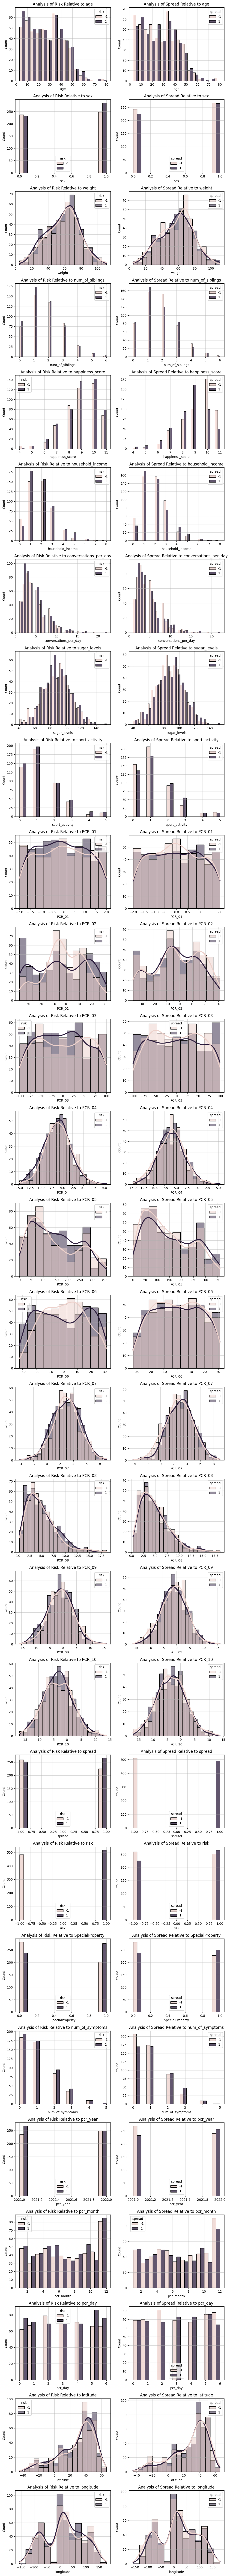

In [ ]:
COL_NAME = train_preprocessed.columns
COLS, ROWS = (2, len(COL_NAME))
plt.figure(figsize=(5 * COLS, 4 * ROWS))
for row in range(ROWS):
  column = COL_NAME[row]
  for j, cls in enumerate(["risk", "spread"]):
    plt.subplot(ROWS,COLS, row * COLS + 1 + j)
    isContinuous = "float" in train_preprocessed[column].dtype.name
    sns.histplot(data=train_preprocessed, x=column, hue=cls, line_kws={"linewidth": 3},
    kde=isContinuous, multiple="layer" if isContinuous else "dodge")
    plt.grid(alpha=0.5)
    plt.title(f"Analysis of {cls.capitalize()} Relative to {column}")
plt.tight_layout()

**Bivariate analysis**

**(Q16)- For each split, perform a bivariate analysis for the PCR features, in relation to the risk**

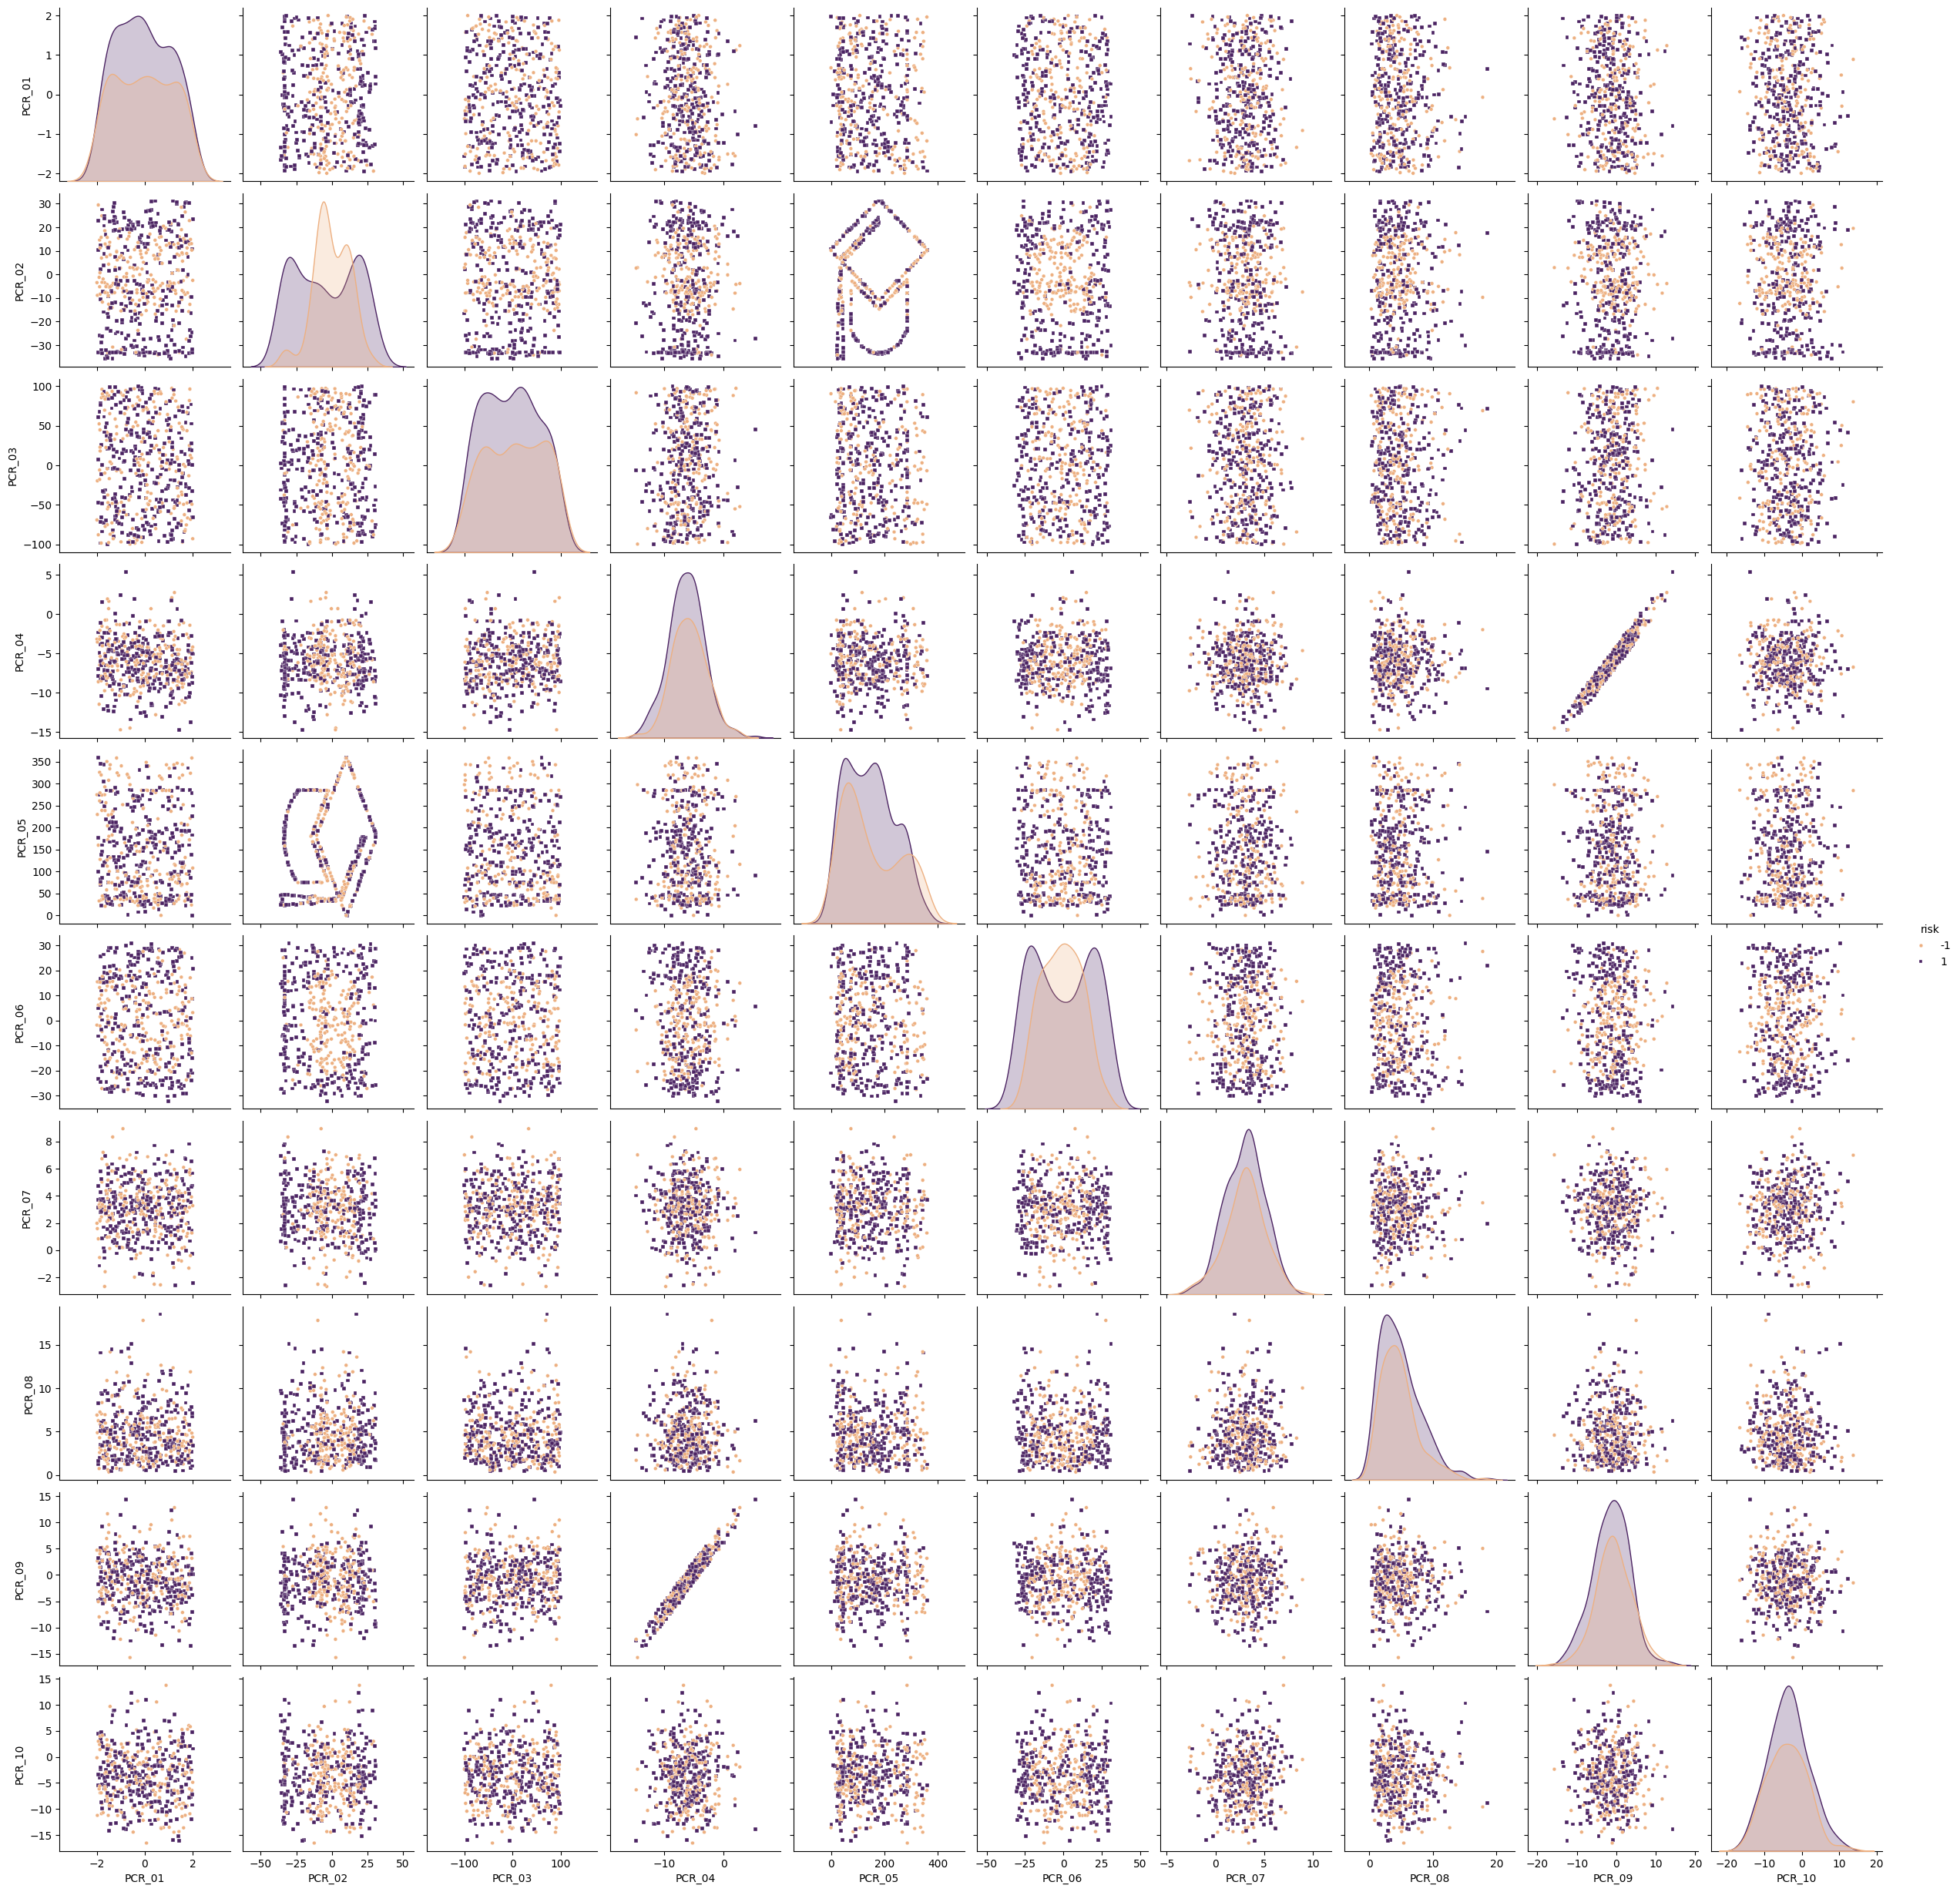

In [ ]:
#here we create pairplot for specialProperty == 1
group1 = train_preprocessed[train_preprocessed.SpecialProperty == 1]
sns.pairplot(group1[group1.filter(like='PCR').columns.tolist() + ["risk"]],
 plot_kws={"s": 12}, hue="risk", palette = "flare", markers=["o", "s"])



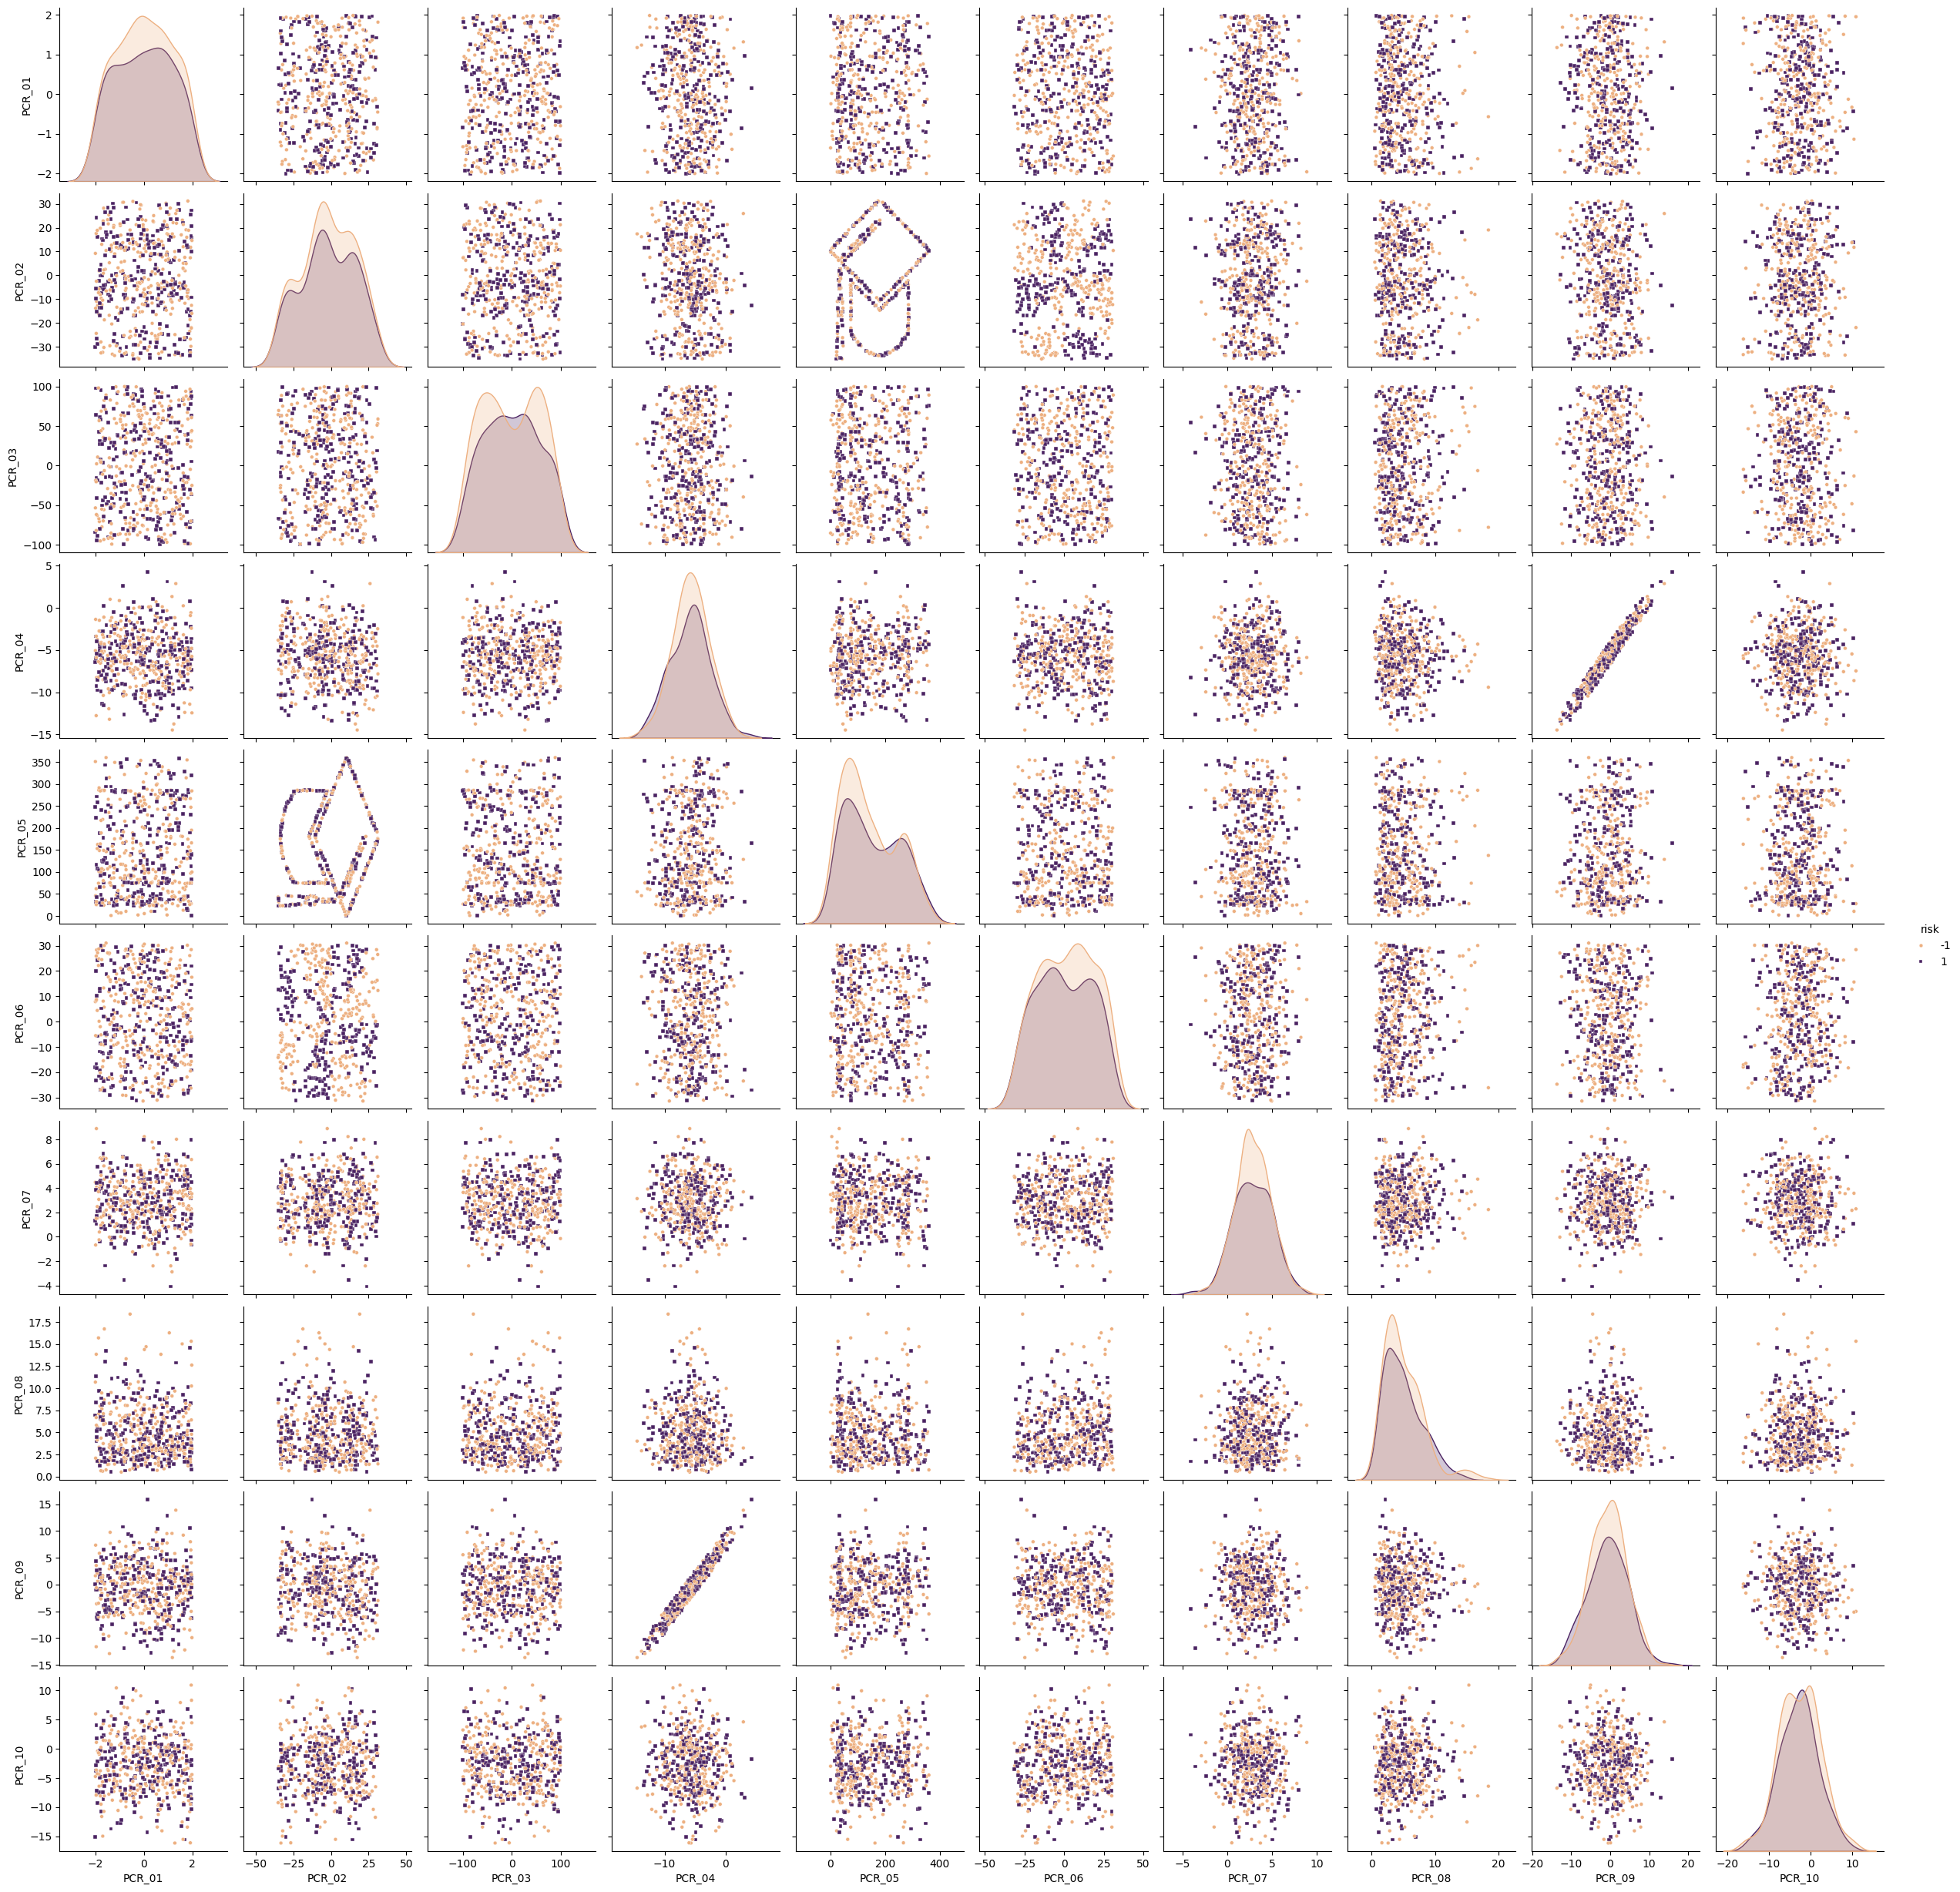

In [ ]:
#here we create pairplot for specialProperty == 0
group0 = train_preprocessed[train_preprocessed.SpecialProperty == 0]
sns.pairplot(group0[group0.filter(like='PCR').columns.tolist() + ["risk"]],
 plot_kws={"s": 12}, hue="risk", palette = "flare", markers=["o", "s"])

**Q17- joinplots for PCR_02 and PCR_06**

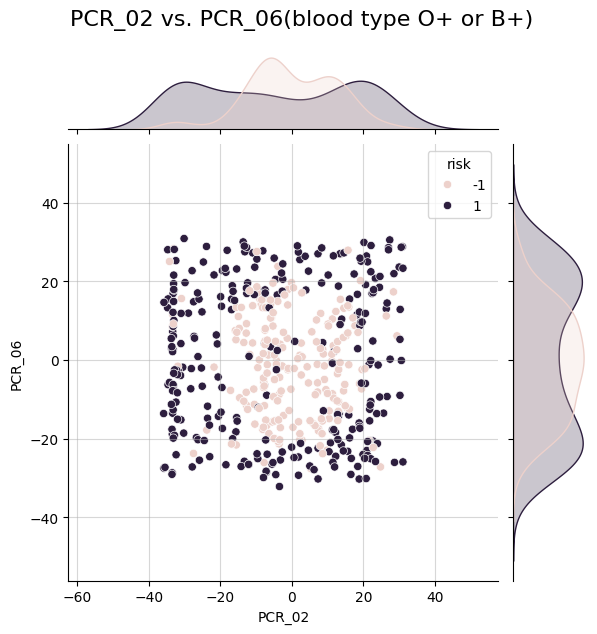

In [ ]:
#join plot 1 for group of O+, B+
jointplot_group1 = sns.jointplot(data=group1, x="PCR_02", y="PCR_06", hue="risk")
_ = jointplot_group1.ax_joint.grid(alpha=0.5)


jointplot_group1.fig.suptitle('PCR_02 vs. PCR_06(blood type O+ or B+)', fontsize=16, y=1.05)
jointplot_group1

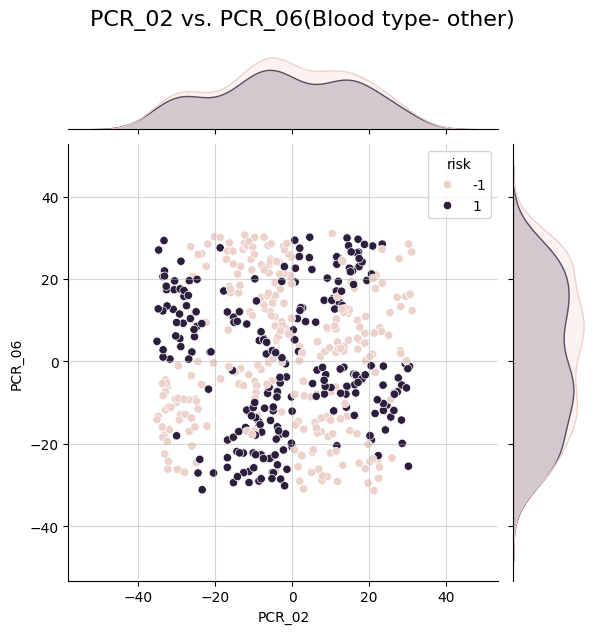

In [ ]:
#join plot 2- for other blood types left
jointplot_group0 = sns.jointplot(data=group0, x="PCR_02", y="PCR_06", hue="risk")
_ = jointplot_group0.ax_joint.grid(alpha=0.5)


jointplot_group0.fig.suptitle('PCR_02 vs. PCR_06(Blood type- other)', fontsize=16, y=1.05)
jointplot_group0

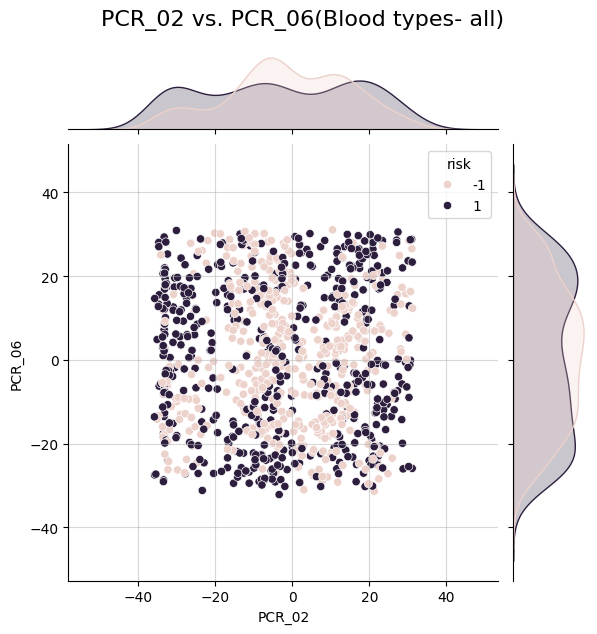

In [ ]:
#joinplot - all data
jointplot_all = sns.jointplot(data=train_preprocessed, x="PCR_02", y="PCR_06", hue="risk")
_ = jointplot_all.ax_joint.grid(alpha=0.5)


jointplot_all.fig.suptitle('PCR_02 vs. PCR_06(Blood types- all)', fontsize=16, y=1.05)
jointplot_all

**(Q18) - 3D plot**

In [ ]:
def plot3d(df, colX, colY, colZ, title, hue=None, s=1):
  %matplotlib inline

  fig = plt.figure(figsize=(20, 4))
  axes = [fig.add_subplot(1, 4, 1, projection='3d'),
          fig.add_subplot(1, 4, 2, projection='3d'),
          fig.add_subplot(1, 4, 3, projection='3d'),
          fig.add_subplot(1, 4, 4, projection='3d')]

  palette = sns.color_palette("hls", 2)

  for i,ax in enumerate(axes):
    if hue is None:
      ax.scatter3D(df[colX], df[colY], df[colZ], color=palette[0], s=s)
    else:
      idx = df[hue] == True
      df1 = df[idx]
      df2 = df[~idx]

      ax.scatter3D(df1[colX], df1[colY], df1[colZ], color=palette[0], s=s)
      ax.scatter3D(df2[colX], df2[colY], df2[colZ], color=palette[1], s=s)

    if i == 3 or i == 1:
      ax.set_xlabel(colX, labelpad=20)
      ax.set_ylabel(colY, labelpad=20)
    else:
      ax.xaxis.set_ticklabels([])
      ax.yaxis.set_ticklabels([])

    ax.view_init(elev=5., azim=45*i+15)

  axes[1].set_zlabel("\n" + colZ, labelpad=1)

  plt.suptitle(title)
  plt.subplots_adjust(wspace=0.1, top=0.99)
  plt.show()

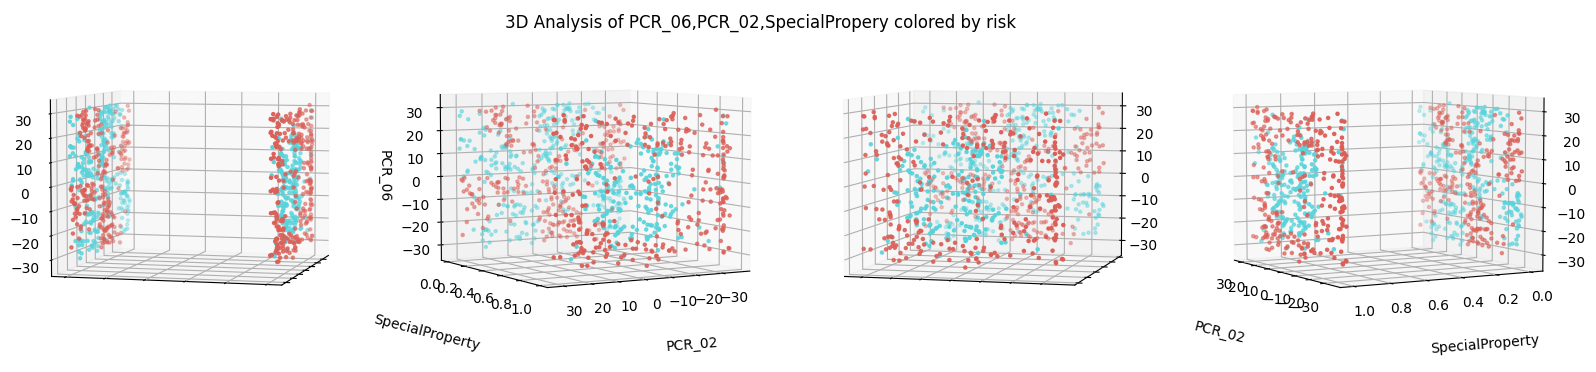

In [ ]:
plot3d(train_preprocessed, "PCR_02", "SpecialProperty", "PCR_06", title="3D Analysis of PCR_06,PCR_02,SpecialPropery colored by risk", hue="risk", s=5)

[Text(0.37770280934343436, 0.98, 'x[0] <= -16.63\nentropy = 0.999\nsamples = 1000\nvalue = [484, 516]'),
 Text(0.12289562289562289, 0.94, 'x[2] <= 0.5\nentropy = 0.896\nsamples = 221\nvalue = [69, 152]'),
 Text(0.06060606060606061, 0.9, 'x[1] <= 0.241\nentropy = 0.999\nsamples = 110\nvalue = [57, 53]'),
 Text(0.03367003367003367, 0.86, 'x[0] <= -24.689\nentropy = 0.65\nsamples = 54\nvalue = [45, 9]'),
 Text(0.020202020202020204, 0.82, 'x[1] <= -18.017\nentropy = 0.169\nsamples = 40\nvalue = [39, 1]'),
 Text(0.013468013468013467, 0.78, 'x[1] <= -18.275\nentropy = 0.469\nsamples = 10\nvalue = [9, 1]'),
 Text(0.006734006734006734, 0.74, 'entropy = 0.0\nsamples = 9\nvalue = [9, 0]'),
 Text(0.020202020202020204, 0.74, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.026936026936026935, 0.78, 'entropy = 0.0\nsamples = 30\nvalue = [30, 0]'),
 Text(0.04713804713804714, 0.82, 'x[1] <= -17.42\nentropy = 0.985\nsamples = 14\nvalue = [6, 8]'),
 Text(0.04040404040404041, 0.78, 'entropy = 0.0\

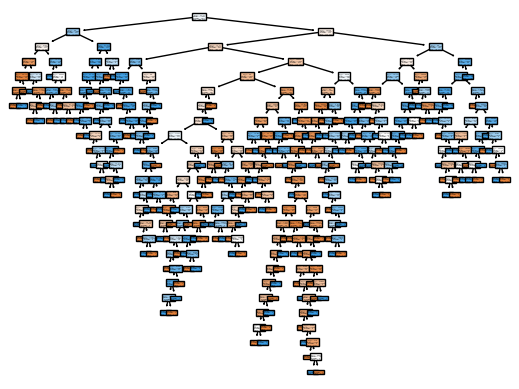

In [ ]:
#trying to see decision trees for question Q19-Q20
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
X_tree_train = train_preprocessed[['PCR_02','PCR_06','SpecialProperty']]
y_tree_train = train_preprocessed['risk']

X_tree_test= test_preprocessed[['PCR_02','PCR_06','SpecialProperty']]
y_tree_test= test_preprocessed['risk']

h_tree_3 = DecisionTreeClassifier(criterion="entropy", max_depth=30)
h_tree_3.fit(X_tree_train, y_tree_train)

training_accuracy_tree_3 = h_tree_3.score(X_tree_test, y_tree_test)

training_accuracy_tree_3

plot_tree(h_tree_3, filled= True)

In [ ]:
train.describe()

patient_id          age       weight  num_of_siblings  \
count  1000.000000  1000.000000  1000.000000       1000.00000   
mean    993.435000    26.652000    58.118200          1.69000   
std     570.389107    15.081523    19.790247          1.22858   
min       1.000000     3.000000     5.000000          0.00000   
25%     506.750000    13.000000    43.775000          1.00000   
50%     994.000000    26.000000    60.300000          2.00000   
75%    1473.250000    38.250000    71.600000          2.00000   
max    1998.000000    80.000000   110.700000          6.00000   

       happiness_score  household_income  conversations_per_day  sugar_levels  \
count      1000.000000       1000.000000            1000.000000   1000.000000   
mean          9.027000          1.911000               4.568000     88.271000   
std           1.439564          1.264388               2.925052     17.933912   
min           4.000000          0.000000               1.000000     40.000000   
25%           8.000000          1.000000               2.000000     76.000000   
50%           9.000000          2.000000               4.000000     88.500000   
75%          10.000000          3.000000               6.000000    100.000000   
max          11.000000          8.000000              22.000000    153.000000   

       sport_activity       PCR_01  ...       PCR_03       PCR_04  \
count     1000.000000  1000.000000  ...  1000.000000  1000.000000   
mean         1.229000    -0.012807  ...     0.181027    -5.912242   
std          1.154943     1.150072  ...    57.611963     3.092975   
min          0.000000    -1.998610  ...   -99.874686   -14.718722   
25%          0.000000    -0.975463  ...   -49.546848    -7.974035   
50%          1.000000    -0.032165  ...     0.340271    -5.927381   
75%          2.000000     0.954856  ...    48.518414    -3.987445   
max          5.000000     1.998911  ...    99.821939     5.336629   

            PCR_05       PCR_06       PCR_07       PCR_08       PCR_09  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean    147.856048     0.275301     2.932990     4.913790    -0.834939   
std      97.485279    17.161710     2.039952     3.075193     4.765833   
min       0.000000   -32.164320    -4.089695     0.339915   -15.703871   
25%      66.035490   -14.258500     1.570013     2.604295    -4.013749   
50%     127.444808    -0.006177     2.944450     4.294079    -0.806593   
75%     235.345177    14.895830     4.325565     6.593514     2.311012   
max     360.000000    31.053800     8.941432    18.545452    15.860804   

            PCR_10     spread         risk  
count  1000.000000  1000.0000  1000.000000  
mean     -3.181765    -0.0200     0.032000  
std       5.119480     1.0003     0.999988  
min     -16.557756    -1.0000    -1.000000  
25%      -6.622945    -1.0000    -1.000000  
50%      -3.204381    -1.0000     1.000000  
75%       0.155825     1.0000     1.000000  
max      13.750107     1.0000     1.000000  

[8 rows x 21 columns]

# Part 4: More Data Normalization

**Task F**

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
#normalize chosen columns
columns_to_standardize = ['longitude', 'latitude', 'weight', 'num_of_siblings', 'happiness_score', 'household_income', 'conversations_per_day', 'sugar_levels', 'sport_activity', 'num_of_symptoms', 'PCR_07', 'PCR_08','PCR_09', 'PCR_10','PCR_04']
columns_to_minmax = ['age', 'pcr_year', 'pcr_month', 'pcr_day', 'PCR_01', 'PCR_02', 'PCR_03', 'PCR_05', 'PCR_06']

# Standardize columns
scaler_standard = StandardScaler().fit(train_preprocessed[columns_to_standardize])
train_preprocessed[columns_to_standardize] = scaler_standard.transform(train_preprocessed[columns_to_standardize])
test_preprocessed[columns_to_standardize] = scaler_standard.transform(test_preprocessed[columns_to_standardize])
# MinMax scale columns
scaler_minmax = MinMaxScaler().fit(train_preprocessed[columns_to_minmax])
train_preprocessed[columns_to_minmax] = scaler_minmax.transform(train_preprocessed[columns_to_minmax])
test_preprocessed[columns_to_minmax] = scaler_minmax.transform(test_preprocessed[columns_to_minmax])

**(Q22)**

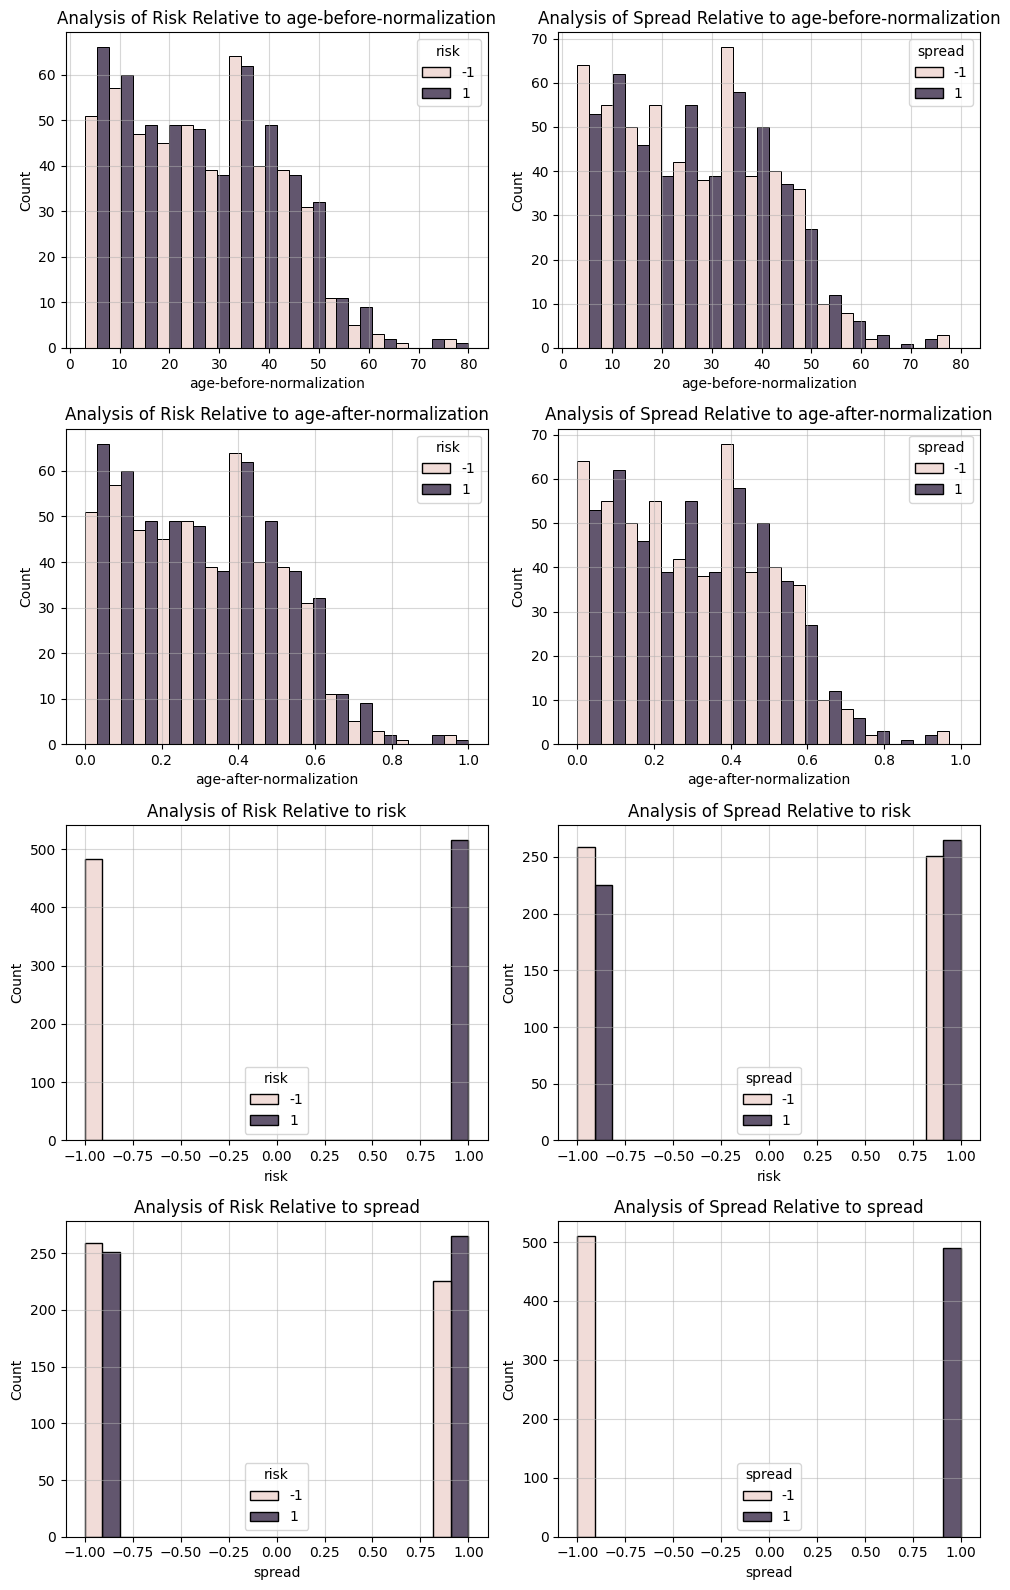

In [ ]:
import pandas as pd

temp_age_df= pd.DataFrame()
temp_age_df['age-before-normalization'] = train['age']
temp_age_df['age-after-normalization'] = train_preprocessed['age']
temp_age_df['risk']= train['risk']
temp_age_df['spread'] = train['spread']


COL_NAME = temp_age_df.columns
COLS, ROWS = (2, len(COL_NAME))
plt.figure(figsize=(5 * COLS, 4 * ROWS))
for row in range(ROWS):
  column = COL_NAME[row]
  for j, cls in enumerate(["risk", "spread"]):
    plt.subplot(ROWS,COLS, row * COLS + 1 + j)
    sns.histplot(data=temp_age_df, x=column, hue=cls, line_kws={"linewidth": 3},
    kde=False, multiple="dodge")
    plt.grid(alpha=0.5)
    plt.title(f"Analysis of {cls.capitalize()} Relative to {column}")
plt.tight_layout()

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler

def count_symptoms(symptoms):
  symptoms_list = symptoms.split(';')
  return len(symptoms_list) if symptoms_list != [''] else 0

def prepare_data(training_data, new_data):
    # Copy the data to avoid modifying the original
    data_preprocessed = new_data.copy()
    training_preprocessed = training_data.copy()
    #Create Special property
    training_preprocessed['SpecialProperty'] =  training_preprocessed['blood_type'].isin(['O+', 'B+']).astype(int)
    training_preprocessed.drop('blood_type', axis=1, inplace=True)
    data_preprocessed['SpecialProperty'] = data_preprocessed['blood_type'].isin(['O+', 'B+']).astype(int)
    data_preprocessed.drop('blood_type', axis=1, inplace=True)

    #Create num_symptoms
    # Replace NaN with empty strings
    training_preprocessed['symptoms'] = training_preprocessed['symptoms'].fillna('').astype(str)
    data_preprocessed['symptoms'] = data_preprocessed['symptoms'].fillna('').astype(str)
    # Count the number of symptoms each patient has
    training_preprocessed['num_of_symptoms'] = training_preprocessed['symptoms'].apply(count_symptoms)
    data_preprocessed['num_of_symptoms'] = data_preprocessed['symptoms'].apply(count_symptoms)
    # Drop the 'symptoms' column
    training_preprocessed.drop('symptoms', axis=1, inplace=True)
    data_preprocessed.drop('symptoms', axis=1, inplace=True)

    #Change sex to be 1/0
    training_preprocessed['sex'] = training_preprocessed['sex'].map({'M': 0, 'F': 1})
    data_preprocessed['sex'] = data_preprocessed['sex'].map({'M': 0, 'F': 1})

    #Remove paitent id
    training_preprocessed.drop('patient_id', axis=1, inplace=True)
    data_preprocessed.drop('patient_id', axis=1, inplace=True)

    # Handle date - transform it number of days since 0000-01-01
    training_preprocessed['pcr_date'] = pd.to_datetime(training_preprocessed['pcr_date'])
    data_preprocessed['pcr_date'] = pd.to_datetime(data_preprocessed['pcr_date'])
    # Extract year, month, and day
    training_preprocessed['pcr_year'] = training_preprocessed['pcr_date'].dt.year
    training_preprocessed['pcr_month'] = training_preprocessed['pcr_date'].dt.month
    training_preprocessed['pcr_day'] = training_preprocessed['pcr_date'].dt.dayofweek

    data_preprocessed['pcr_year'] = data_preprocessed['pcr_date'].dt.year
    data_preprocessed['pcr_month'] = data_preprocessed['pcr_date'].dt.month
    data_preprocessed['pcr_day'] = data_preprocessed['pcr_date'].dt.dayofweek

    #Remove the original `pcr_date`
    training_preprocessed.drop('pcr_date', axis=1, inplace=True)
    data_preprocessed.drop('pcr_date', axis=1, inplace=True)

    # Split 'current_location' into 'latitude' and 'longitude'
    training_preprocessed[['latitude', 'longitude']] = training_preprocessed['current_location'].str.strip("()").str.replace("'", "").str.split(',', expand=True).astype(float)
    data_preprocessed[['latitude', 'longitude']] = data_preprocessed['current_location'].str.strip("()").str.replace("'", "").str.split(',', expand=True).astype(float)

    #Remove the original 'current_location' column
    training_preprocessed.drop('current_location', axis=1, inplace=True)
    data_preprocessed.drop('current_location', axis=1, inplace=True)

    #normalize chosen columns
    columns_to_standardize = ['longitude', 'latitude', 'weight', 'num_of_siblings', 'happiness_score', 'household_income', 'conversations_per_day', 'sugar_levels', 'sport_activity', 'num_of_symptoms', 'PCR_07', 'PCR_08','PCR_09', 'PCR_10','PCR_04']
    columns_to_minmax = ['age', 'pcr_year', 'pcr_month', 'pcr_day', 'PCR_01', 'PCR_02', 'PCR_03', 'PCR_05', 'PCR_06']

    # Standardize columns
    scaler_standard = StandardScaler().fit(training_preprocessed[columns_to_standardize])
    data_preprocessed[columns_to_standardize] = scaler_standard.transform(data_preprocessed[columns_to_standardize])
    # MinMax scale columns
    scaler_minmax = MinMaxScaler().fit(training_preprocessed[columns_to_minmax])
    data_preprocessed[columns_to_minmax] = scaler_minmax.transform(data_preprocessed[columns_to_minmax])

    return data_preprocessed
